# Play with k8s cluster using python

- __Installation__
  * pip
  * kubernetes
  * pandas (Only needed for cluster data analysis)
  * k8sclient (wrapper for kubernetes)


- __Collect cluster information and data analysis with pandas__
  * setup
  * pod
  * node
  * service
  * etc.
 
  
- __Deploy pod/replicaset/service and some simple usage/test__
  * pods, volume, service and etc.
  * replicaset
  * network connectivity test
  * file system test (fio), network throughput (iperf), pod stress test and etc
  * service search
  * query api (hubot)

## Installation
#### [pip](https://pip.pypa.io/en/stable/installing/)
>Be cautious if you're using a Python install that's managed by your operating system or another package manager. get-pip.py does not coordinate with those tools, and may leave your system in an inconsistent state.
>To install pip via package manager, use package name python-pip
>Python3 is recommented though, not sure thoes numpy/pandas package can work well with python3

```shell
wget https://bootstrap.pypa.io/get-pip.py
python get-pip.py
```

#### [kubernetes](https://github.com/kubernetes-incubator/client-python/)
```shell
pip install kubernetes
```
> Usefully documentation links 
   * [auto generated docs](https://github.com/kubernetes-incubator/client-python/blob/master/kubernetes/README.md)
   * [api references](https://kubernetes.io/docs/api-reference/v1.6/)


#### [pandas](pandas.pydata.org/pandas-docs/stable/)
```shell
pip install pandas
```

#### k8sclient
```shell
git clone ssh://git@10.19.248.200:30884/DavidWang/k8sft.git
cd k8sft && pip install -e .
```

## Collect cluster information

### notebook setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from k8sclient.keywords import switch_cluster, register_cluster
register_cluster("yancheng", "~/.kube/config-yancheng")
register_cluster("shanghai", "~/.kube/config-shanghai")
switch_cluster("yancheng")
#switch_cluster("shanghai")

In [3]:
#endpoinds
from k8sclient.dataframes import collect_all_endpoints
infos, eps = collect_all_endpoints()

In [12]:
#services
from k8sclient.dataframes import collect_services
services, ports, eips = collect_services()

In [19]:
a = pd.merge(services, infos, on="name")
a

,creation,external_name,name,namespace_x,type,uid_x,creation_timestamp,namespace_y,uid_y
0,2017-04-01 02:22:37+00:00,None,dbe-core-serv,4tools,ClusterIP,12b2aa2c-1682-11e7-a21e-244427a00032,2017-04-01 02:22:45+00:00,4tools,17a160c9-1682-11e7-9fd0-2444279ffce5
1,2017-04-01 02:22:37+00:00,None,dbe-listener-serv,4tools,NodePort,12cbe72b-1682-11e7-9fd0-2444279ffce5,2017-04-01 02:22:45+00:00,4tools,17a9020f-1682-11e7-9fd0-2444279ffce5
2,2017-04-01 02:22:37+00:00,None,dbe-mysql-serv,4tools,ClusterIP,129c04c1-1682-11e7-9e02-244427a00052,2017-04-01 02:22:45+00:00,4tools,1799c124-1682-11e7-9fd0-2444279ffce5
3,2016-12-26 11:06:45+00:00,None,docker-jenkins-svc,4tools,NodePort,6374c2d4-cb5b-11e6-b0cb-244427a00052,2016-12-26 11:06:45+00:00,4tools,637380ae-cb5b-11e6-8bdf-2444279ffce5
4,2017-06-09 07:55:52+00:00,None,download,4tools,NodePort,0ef47ec5-4ce9-11e7-a21e-244427a00032,2017-06-09 07:56:03+00:00,4tools,15ecef1e-4ce9-11e7-88d8-2444279ffce5
5,2017-06-09 07:55:52+00:00,None,download,4tools,NodePort,0ef47ec5-4ce9-11e7-a21e-244427a00032,2017-07-17 01:29:16+00:00,ceph,594a678d-6a8f-11e7-be54-244427a00052
6,2017-07-17 01:29:16+00:00,None,download,ceph,NodePort,5938c0ae-6a8f-11e7-8e47-244427a00032,2017-06-09 07:56:03+00:00,4tools,15ecef1e-4ce9-11e7-88d8-2444279ffce5
7,2017-07-17 01:29:16+00:00,None,download,ceph,NodePort,5938c0ae-6a8f-11e7-8e47-244427a00032,2017-07-17 01:29:16+00:00,ceph,594a678d-6a8f-11e7-be54-244427a00052
8,2017-01-16 01:16:29+00:00,None,enn-cow-svc,4tools,NodePort,689712ee-db89-11e6-8bdf-2444279ffce5,2017-01-16 01:16:36+00:00,4tools,6d2a9b84-db89-11e6-8bdf-2444279ffce5
9,2017-03-14 07:52:49+00:00,None,gitlab,4tools,NodePort,384f90f9-088b-11e7-a7b4-244427a00032,2017-03-14 07:52:49+00:00,4tools,385179f8-088b-11e7-a186-2444279ffce5


In [24]:
t = infos[~infos['uid'].isin(eps["endpoint_id"])]
#t.groupby("namespace").size().reset_index().set_index("namespace")
# t[t['namespace']=='cust-pro']
v = services[services['type']=='NodePort']
a = pd.merge(v, t, on=['namespace',"name"])
a[['namespace', 'name', 'type', 'creation_timestamp']]

,namespace,name,type,creation_timestamp
0,4tools,dbe-listener-serv,NodePort,2017-04-01 02:22:45+00:00
1,4tools,k8s-deploy-api,NodePort,2016-12-05 06:53:32+00:00
2,cc-deployment,cardemo,NodePort,2017-05-08 10:22:45+00:00
3,cc-dev,cc-hadoop,NodePort,2017-07-07 05:53:06+00:00
4,cc-dev,cc-user-loader,NodePort,2017-05-08 09:46:14+00:00
5,cc-lf,cc-harbor,NodePort,2017-09-07 05:10:56+00:00
6,cc-lf,console-doc,NodePort,2017-07-13 08:42:47+00:00
7,chenghao,monitoring-opentsdb-debug,NodePort,2017-11-16 07:35:32+00:00
8,cust-pro,emqttd-service-all,NodePort,2017-07-07 02:23:11+00:00
9,dataflow-demo-ye,dataflow-svc,NodePort,2017-08-08 10:09:54+00:00


### Pod information

#### collect all pods information

In [3]:
from k8sclient.dataframes import collect_all_pods
pods = collect_all_pods()

In [8]:
pods['container'].columns

Index([u'args', u'command', u'image', u'image_pull_policy', u'lcpu',
       u'lmemory', u'name', u'pod_id', u'rcpu', u'ready', u'restart_count',
       u'rmemory', u'state'],
      dtype='object')

#### list abnormal pods

In [4]:
pd.options.display.max_colwidth = 200
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
bads = container[((container['state'] != 'running') | (container['phase'] != 'Running'))]
# bads[['namespace', 'pod', 'phase', 'state', "state_message", "state_reason"]].set_index(['namespace', 'pod']).dropna()
# only pods without any container
bads[pd.isnull(bads['state_message'])][['namespace', 'pod', 'phase', 'state', "state_message", "state_reason"]].set_index(['namespace', 'pod'])


phase    state state_message  \
namespace    pod                                                         
cc-qa-test   a-0                        Pending  unknown           NaN   
             mysql-ss2-0                Pending  unknown           NaN   
             mysql-test-0               Pending  unknown           NaN   
cc-wjx-local app-0                      Pending  unknown           NaN   
zhuangwei    datanode-1467986209-pdv9c  Pending  unknown           NaN   
             datanode-1467986209-r9sff  Pending  unknown           NaN   

                                       state_reason  
namespace    pod                                     
cc-qa-test   a-0                                NaN  
             mysql-ss2-0                        NaN  
             mysql-test-0                       NaN  
cc-wjx-local app-0                              NaN  
zhuangwei    datanode-1467986209-pdv9c          NaN  
             datanode-1467986209-r9sff          NaN

In [5]:
pd.options.display.max_colwidth = 200
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
bads = container[((container['state'] != 'running') | (container['phase'] != 'Running'))]
bads[['namespace', 'pod', 'phase', 'state', "state_message", "state_reason"]].set_index(['namespace', 'pod']).dropna()

phase       state  \
namespace      pod                                                           
ary            pre1-resourcemanager2-2199373625-2jgrd  Running     waiting   
               zhmdmserver-pre-3491395357-fx0c3        Pending     waiting   
cc-demo        mysql-1287438715-s1z5r                  Pending     waiting   
               test-129128555-dsh5s                    Pending     waiting   
               test-1359566091-23qlq                   Pending     waiting   
cc-dev         cc-mongo-182646078-cfpr5                Pending     waiting   
hadoop         hadooptest-3513771803-vd8cl             Pending     waiting   
               hadooptest1-2241652605-v3zkn            Pending     waiting   
jingwuyun-test testapp-2510930643-fxzq7                Running     waiting   
lockperftest   pre1-namenode2-3659866771-t9pk0         Running     waiting   
netr-nju1      kvpod3-3617761536-gkzd7                 Pending     waiting   
               netr-nju1-namenode2-3404895209-qd2ph    Running  terminated   
streaming-demo namenode1-3994914718-jgkfj              Running     waiting   

                                                                                                                                                                                              state_message  \
namespace      pod                                                                                                                                                                                            
ary            pre1-resourcemanager2-2199373625-2jgrd  Back-off 5m0s restarting failed container=pre1-resourcemanager2 pod=pre1-resourcemanager2-2199373625-2jgrd_ary(db9aa020-92f5-11e7-b527-244427a00032)   
               zhmdmserver-pre-3491395357-fx0c3                                                                                                                                                          NA   
cc-demo        mysql-1287438715-s1z5r                                                                                                       Back-off pulling image "127.0.0.1:30100/console/mysql-utf8:3.7"   
               test-129128555-dsh5s                                                                                                                                           Back-off pulling image "busy"   
               test-1359566091-23qlq                                                                                                                           Back-off pulling image "127.0.0.1:30100/ddd"   
cc-dev         cc-mongo-182646078-cfpr5                                                                                                                                                                  NA   
hadoop         hadooptest-3513771803-vd8cl                                                                                  Back-off pulling image "10.19.248.12:30100/tools/dep-centos7-hadoop-2.7.3:test"   
               hadooptest1-2241652605-v3zkn                                                                                 Back-off pulling image "10.19.248.12:30100/tools/dep-centos7-hadoop-2.7.3:test"   
jingwuyun-test testapp-2510930643-fxzq7                                   Back-off 5m0s restarting failed container=mysql pod=testapp-2510930643-fxzq7_jingwuyun-test(502c67d0-5d6a-11e7-ba76-244427a00052)   
lockperftest   pre1-namenode2-3659866771-t9pk0              Back-off 5m0s restarting failed container=pre1-namenode2 pod=pre1-namenode2-3659866771-t9pk0_lockperftest(b275bf83-9de6-11e7-b527-244427a00032)   
netr-nju1      kvpod3-3617761536-gkzd7                                                                                                                                                                   NA   
               netr-nju1-namenode2-3404895209-qd2ph                                                                                                                                                

In [4]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
bads = container[((container['state'] != 'running') | (container['phase'] != 'Running'))]
bb = bads[['namespace', 'pod', 'phase', 'state', 'host_ip', 'rmemory', 'rcpu', 'stime']].dropna()
# bb[bb.phase == 'Running']
c = bads.groupby(['namespace', "phase"]).size().reset_index().set_index(["namespace","phase"])
c.columns = ['count']
c

count
namespace      phase         
ary            Pending      1
               Running      1
cc-demo        Pending      3
cc-dev         Pending      1
cc-qa-test     Pending      3
cc-wjx-local   Pending      1
hadoop         Pending      2
jingwuyun-test Running      1
lockperftest   Running      1
streaming-demo Running      1
zhuangwei      Pending      2

In [ ]:
pods['pod'].columns
# container[container.command.str.contains("exe")]

#### list pod count using host-path

In [32]:
v = pods['volume']
# hp = v[v.vtype == "host_path"].dropna(axis=1)
hp = v[v.vtype == "host_path"]
hpp = pd.merge(pods['pod'], hp, left_on="uid", right_on="pod_id")
hpp[hpp['host_ip'] == "10.19.248.24"][['name', 'path',"namespace", "pod"]]
# hpp[["name", "path", "host_ip", "namespace", "pod"]].groupby("namespace").size().reset_index().set_index("namespace")

,name,path,namespace,pod
295,logfile,/var/log/kubernetes/kube-proxy,kube-system,kube-proxy-10.19.248.24
296,certificate,/etc/kubernetes/,kube-system,kube-proxy-10.19.248.24
428,var-log,/var/log,monitor-system-log,elasticsearch-fluent-q2qk9
429,pos-storage,/mnt/monitor-system-log/elasticsearch-fluent,monitor-system-log,elasticsearch-fluent-q2qk9
430,data,/data/docker/containers,monitor-system-log,elasticsearch-fluent-q2qk9


In [22]:
v = pods['volume']
tv = pd.merge(pods['pod'], v, left_on="uid", right_on="pod_id")
t = tv[["namespace", "pod", 'name', 'path', "host_ip"]].dropna()
tt = t[t.path.str.contains("kubernetes")]
tt[tt.host_ip == "10.19.248.18"]

,namespace,pod,name,path,host_ip
966,kube-system,haproxy-10.19.248.18,pem,/etc/kubernetes/ca_file/node/client.pem,10.19.248.18
976,kube-system,kube-lego-4026317241-w3mkf,kubeconfig,/etc/kubernetes/node-kubeconfig,10.19.248.18
995,kube-system,kube-proxy-10.19.248.18,logfile,/var/log/kubernetes/kube-proxy,10.19.248.18
996,kube-system,kube-proxy-10.19.248.18,certificate,/etc/kubernetes/,10.19.248.18


In [53]:
hpp[hpp.namespace=="jingwuyun"]

,cluster_name,ctime,dns_policy,host_ip,host_ipc,host_network,host_pid,namespace,node_name,phase,pod,pod_ip,restart_policy,stime,uid,name,path,pod_id,vtype
263,None,2017-07-28 07:01:17+00:00,ClusterFirst,10.19.248.14,None,None,None,jingwuyun,10.19.248.14,Running,jenkins-slave-alpine-git-260601664-6fflf,172.16.121.29,Always,2017-07-28 07:01:18+00:00,8d5d5651-7362-11e7-a0f0-244427a00052,docker-socket,/var/run/docker.sock,8d5d5651-7362-11e7-a0f0-244427a00052,host_path
264,None,2017-07-28 07:01:17+00:00,ClusterFirst,10.19.248.14,None,None,None,jingwuyun,10.19.248.14,Running,jenkins-slave-alpine-git-260601664-6fflf,172.16.121.29,Always,2017-07-28 07:01:18+00:00,8d5d5651-7362-11e7-a0f0-244427a00052,kubeconfig,/etc/kubernetes/node-kubeconfig,8d5d5651-7362-11e7-a0f0-244427a00052,host_path
265,None,2017-07-28 07:01:17+00:00,ClusterFirst,10.19.248.14,None,None,None,jingwuyun,10.19.248.14,Running,jenkins-slave-jwy-358576113-c5vd2,172.16.121.31,Always,2017-07-28 07:01:18+00:00,8d80e8c8-7362-11e7-a0f0-244427a00052,docker-socket,/var/run/docker.sock,8d80e8c8-7362-11e7-a0f0-244427a00052,host_path
266,None,2017-07-28 07:01:17+00:00,ClusterFirst,10.19.248.14,None,None,None,jingwuyun,10.19.248.14,Running,jenkins-slave-jwy-358576113-c5vd2,172.16.121.31,Always,2017-07-28 07:01:18+00:00,8d80e8c8-7362-11e7-a0f0-244427a00052,kubeconfig,/etc/kubernetes/node-kubeconfig,8d80e8c8-7362-11e7-a0f0-244427a00052,host_path


#### found 0 limit pods

In [4]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
bads = runnings[(runnings.lmemory == 0) | (runnings.lcpu == 0)]
pd.DataFrame({"#pods without memory/cpu limit": bads.groupby("namespace").size()})

,#pods without memory/cpu limit
namespace,
aaron,3
ary,29
cc-dev,1
chokeq,14
cust-pro,2
dataflow-demo,1
dataflow-demo-ye,26
ex-kafka,14
hadoop-dq,11


In [26]:
# kill 0 request/limit pods
from k8sclient.keywords import apply_resource_limit
specials = ['health-check', 'kube-system', "haproxy", "4tools"]
seondaries = ['ex-kafka', "jingwuyun", "jingwuyun-stable", "jingwuyun-test"]
def apply_limit(ns):
    if ns in specials:
        print "%s is special, just ignore it." % n
        apply_resource_limit(ns, min_cpu=None, min_memory=None)
        return
    if ns in seondaries:
        print "%s is secondary special, set lower min value" % n
        apply_resource_limit(ns, min_cpu="200m", min_memory="256Mi", 
                             default_request_cpu="400m", default_request_memory="2G",
                            default_limit_cpu="2",
                            default_limit_memory="8G")
        return
    apply_resource_limit(ns, min_cpu="300m", min_memory="1G", 
                             default_request_cpu="400m", default_request_memory="2G",
                            default_limit_cpu="2",
                            default_limit_memory="8G")
    
from k8sclient.keywords import apply_resource_limit, delete_pod
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
bads = container[(container.lmemory == 0) | (container.lcpu == 0) | (container.rmemory == 0) | (container.rcpu == 0)]
# bads[bads.namespace == 'ex-kafka'][["namespace", "pod", 'rmemory', 'rcpu', 'lmemory', 'lcpu']]#.groupby('namespace').size().reset_index()
bns = []
for b in bads.iterrows():
    n = b[1].namespace
    if n in ['health-check', 'monitor-essential-service']:
        continue
    if n not in bns:
        bns.append(n)
        apply_limit(n)
        pass
    print b[1].namespace, b[1].pod
    delete_pod(b[1].namespace, b[1].pod)

aaron pre1-zookeeper1-1570441002-sxlw0
aaron pre1-zookeeper2-3220703023-l8cn1
aaron pre1-zookeeper3-576980788-w3n4l
ary broker-2980420853-sch35
ary coordinator1-3748636756-3r4rs
ary historical-749510712-tzpbl
ary middlemanager-1404150936-3sffm
ary mysql1-2343867105-c83cp
ary overlord1-2514264641-rkwvl
ary pre1-datanode-1275045319-hft2w
ary pre1-hmaster1-391761945-9dcvx
ary pre1-hmaster2-1259786269-1crhx
ary pre1-hmaster3-2127810593-trrwb
ary pre1-journalnode1-3446138147-mwdjk
ary pre1-journalnode2-1517610282-s0j70
ary pre1-journalnode3-3883066673-dqh3d
ary pre1-memcached1-1309913580-nt6j4
ary pre1-namenode1-1379471499-10znc
ary pre1-namenode2-2454131636-8lj0d
ary pre1-nodemanager-4198413923-s8xj0
ary pre1-regionserver1-16372583-j1l31
ary pre1-regionserver2-648074090-09fj4
ary pre1-regionserver3-1279775597-nfzf8
ary pre1-resourcemanager1-201246516-3tsg2
ary pre1-zookeeper1-680922814-1mrqf
ary zhmdmserver-pre-3491395357-fx0c3
cust-pro docker-jenkins-3507466331-l4kjr
cust-pro emqttd-node1

In [8]:
bads[bads.namespace=='miao'][['pod']]

,pod
567,zoo-4-clickhouse-2473166165-ppg9v


#### cpu request too much

In [8]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
# runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
runnings = container[(container['state'] == 'running')]
bads = runnings[(runnings.rcpu > 1) ]
bads[['namespace', "pod", 'rcpu', 'rmemory']].sort_values(by="rcpu", ascending=False)

,namespace,pod,rcpu,rmemory
517,yechunan,orientdb-313092577-nl34c,2.0,2.000000
35,cc-dev,cc-template-194725396-hmr4z,1.3,1.855469


#### simple plot

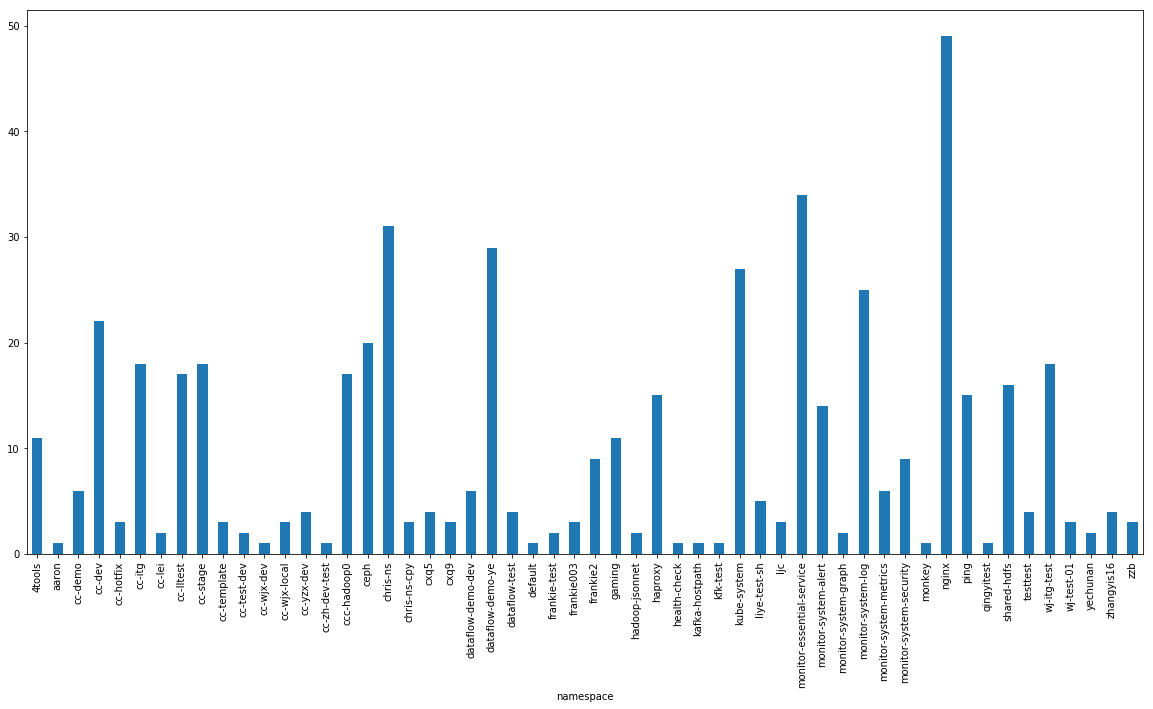

In [9]:
bins = pods['pod'].groupby(['namespace']).size()
bins.plot(kind="bar", figsize=(20,10))


#### plot node resource request percentage

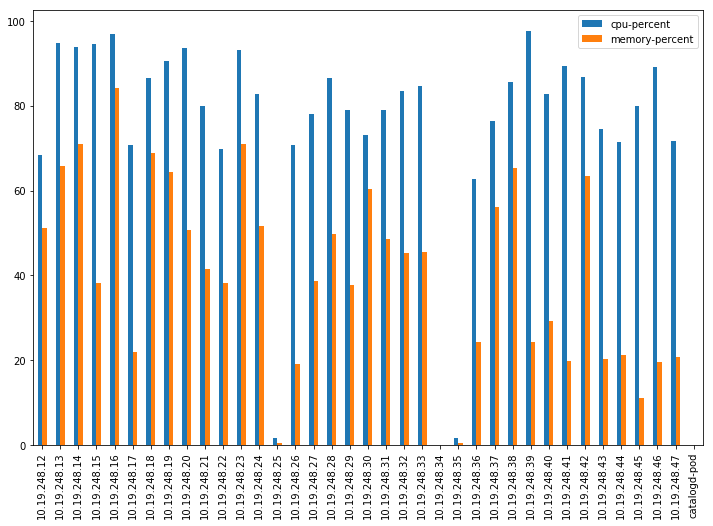

In [4]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
# runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
runnings = container[(container['phase'] == 'Running')]
res = runnings[["host_ip", "rcpu", "rmemory",]]# "lcpu", "lmemory", "pod"]]
# res.groupby('host_ip').sum().plot(kind='bar')
# percentage
a = res.groupby('host_ip').sum()
from k8sclient.dataframes import collect_nodes
nodes = collect_nodes().set_index("name")[["a-cpu", "a-memory"]]
b = pd.concat([a, nodes], axis=1)
b["cpu-percent"] = b['rcpu']*100/b['a-cpu']
b["memory-percent"] = b['rmemory']*100/b['a-memory']
b[['cpu-percent', "memory-percent"]].plot(kind='bar', figsize=(12,8))

In [12]:
res_namespace = runnings[["namespace", "rcpu", "rmemory", "lcpu", 'lmemory']]
b = res_namespace.groupby('namespace').sum()
# b[b.rcpu > 0]['rcpu'].plot(kind='barh', figsize=(12,8))
b.sort_values('lmemory', ascending=False)

,rcpu,rmemory,lcpu,lmemory
namespace,,,,
liangrenhua,129.50,995.000000,354.50,1442.000000
monitor-essential-service,142.30,944.859375,737.80,1412.367188
ex-kafka,59.20,191.000000,171.00,564.000000
ceph,45.40,68.000000,93.30,411.000000
shared-hadoop,14.00,89.000000,48.00,372.000000
monitor-system-log,24.00,43.156250,116.00,369.562500
miao,75.30,241.000000,76.60,243.000000
g-laikang-sh-pro,69.80,110.644531,111.10,194.953125
druid-pe,81.50,185.000000,81.50,185.000000


#### find memory request -ill configured pods

In [11]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
bads = runnings[(runnings.rmemory > 64) | (runnings.lmemory > 64)]
bads[['namespace', "pod", 'rmemory']]

,namespace,pod,rmemory


#### plot running pod per node

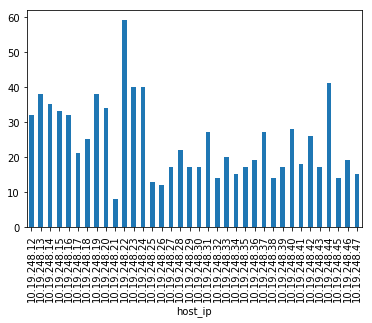

In [31]:
p = pods['pod']
runnings = p[p['phase'] == 'Running']
runnings.groupby('host_ip').size().plot(kind='bar')

#### plot running containers per node

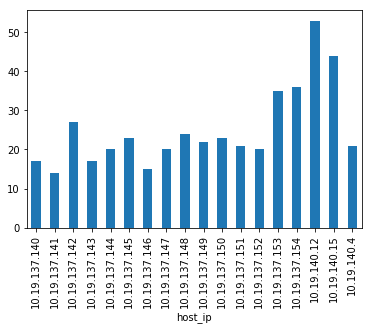

In [13]:
container = pd.merge(pods['pod'], pods['container'], left_on="uid", right_on="pod_id")
runnings = container[(container['state'] == 'running') & (container['phase'] == 'Running')]
runnings.groupby('host_ip').size().plot(kind='bar')

#### read pod logs

In [ ]:
from k8sclient.keywords import tail_pod_logs
r = tail_pod_logs("monitor-essential-service", "elasticsearch-data-734v4", lines=20)
# r.strip().split("\n")
print r

### Node information

In [14]:
from k8sclient.dataframes import collect_nodes
nodes = collect_nodes()
# nodes[["name","a-cpu", "a-memory", "a-pods", "c-cpu", "c-memory", "purpose", "role"]].set_index("name")

In [15]:
nodes[nodes.name=='10.19.248.43'].T

""
DiskPressure
MemoryPressure
OutOfDisk
Ready
a-cpu
a-memory
a-pods
addition
beta.kubernetes.io/arch
beta.kubernetes.io/os


In [16]:
n = nodes.set_index("name")
n[n.nvidiagpu > 0][["a-cpu", "a-memory", "a-pods", "addition", "nvidiagpu"]]

,a-cpu,a-memory,a-pods,addition,nvidiagpu
name,,,,,
10.19.137.147,7.0,60.596355,600,GPU,2
10.19.137.148,7.0,60.596340,600,GPU,2
10.19.137.149,7.0,60.596359,600,GPU,2
10.19.137.150,7.0,60.596359,600,GPU,2
10.19.137.151,7.0,60.596268,600,GPU,2


### Service information

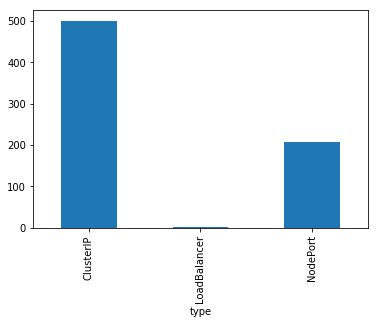

In [96]:
%matplotlib inline
from k8sclient.dataframes import collect_services
services, ports, eips = collect_services()
services.groupby("type").size().plot(kind="bar")

In [132]:

a = pd.merge(services, ports, left_on="uid", right_on="service_id")
b = a[['namespace', "name_x", "type", "port", "target_port"]]
# external_ports[external_ports.service_id == "d3bc3955-42c3-11e7-a21e-244427a00032"]
a[a.port=="27091"]

,creation,external_name,name_x,namespace,type,uid,name_y,node_port,port,protocol,service_id,target_port
1360,2017-05-27 10:04:09+00:00,None,prometheus-pushgateway,monitor-system-alert,NodePort,d3bc3955-42c3-11e7-a21e-244427a00032,p1,31091,27091,TCP,d3bc3955-42c3-11e7-a21e-244427a00032,9091


#### check conflict external ip ports

In [18]:
import pandas as pd
external_ports = pd.merge(ports, eips)
a = pd.merge(services, external_ports, left_on="uid", right_on="service_id")
b = a[['namespace', "name_x", "type", "port", "target_port", "external_ip"]]
c = b[["external_ip", "port"]].duplicated(keep=False)
b[c].set_index(["external_ip","port"]).sort_index()

namespace              name_x       type  \
external_ip   port                                                              
10.19.137.140 22181                      aaron  pre1-zookeeper1-ex  ClusterIP   
              22181                ccc-hadoop0  demo-zookeeper1-ex  ClusterIP   
              22181          dataflow-demo-dev  pre1-zookeeper1-ex  ClusterIP   
              22181                   dataflow  pre1-zookeeper1-ex  ClusterIP   
              22181               liye-test-sh  pre1-zookeeper1-ex  ClusterIP   
              22181  monitor-essential-service  pre1-zookeeper1-ex  ClusterIP   
              8180            dataflow-demo-ye          kafka2hdfs  ClusterIP   
              8180                        ping          kafka2hdfs  ClusterIP   
              8181            dataflow-demo-ye          kafka2hdfs  ClusterIP   
              8181                        ping          kafka2hdfs  ClusterIP   
10.19.137.141 22181                      aaron  pre1-zookeeper2-ex  ClusterIP   
              22181                ccc-hadoop0  demo-zookeeper2-ex  ClusterIP   
              22181          dataflow-demo-dev  pre1-zookeeper2-ex  ClusterIP   
              22181                   dataflow  pre1-zookeeper2-ex  ClusterIP   
              22181               liye-test-sh  pre1-zookeeper2-ex  ClusterIP   
              22181  monitor-essential-service  pre1-zookeeper2-ex  ClusterIP   
10.19.137.142 22181                      aaron  pre1-zookeeper3-ex  ClusterIP   
              22181                ccc-hadoop0  demo-zookeeper3-ex  ClusterIP   
              22181          dataflow-demo-dev  pre1-zookeeper3-ex  ClusterIP   
              22181                   dataflow  pre1-zookeeper3-ex  ClusterIP   
              22181               liye-test-sh  pre1-zookeeper3-ex  ClusterIP   
              22181  monitor-essential-service  pre1-zookeeper3-ex  ClusterIP   

                    target_port  
external_ip   port               
10.19.137.140 22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              8180         8180  
              8180         8180  
              8181         8181  
              8181         8181  
10.19.137.141 22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
10.19.137.142 22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181  
              22181        2181

#### check conflict Nodeport ports

In [19]:
import pandas as pd
a = pd.merge(services, ports, left_on="uid", right_on="service_id")
b = a[['namespace', "name_x", "type", "node_port", "target_port"]]
c = b["node_port"].duplicated(keep=False) & (b.node_port != "None")
b[c].set_index(["node_port"]).sort_index()

,namespace,name_x,type,target_port
node_port,,,,


#### check conflict between nodeport and external ip ports

In [20]:
import pandas as pd
external_ports = pd.merge(ports, eips)
a = pd.merge(services, ports, left_on="uid", right_on="service_id")
node_ports = a[a.type=="NodePort"][['namespace', "name_x", "type", "node_port", "target_port"]]
pd.merge(node_ports, external_ports, left_on="node_port", right_on="port", how="outer").dropna()
# external_ports

,namespace,name_x,type,node_port_x,target_port_x,name,node_port_y,port,protocol,service_id,target_port_y,external_ip


#### plot service type  per namespace

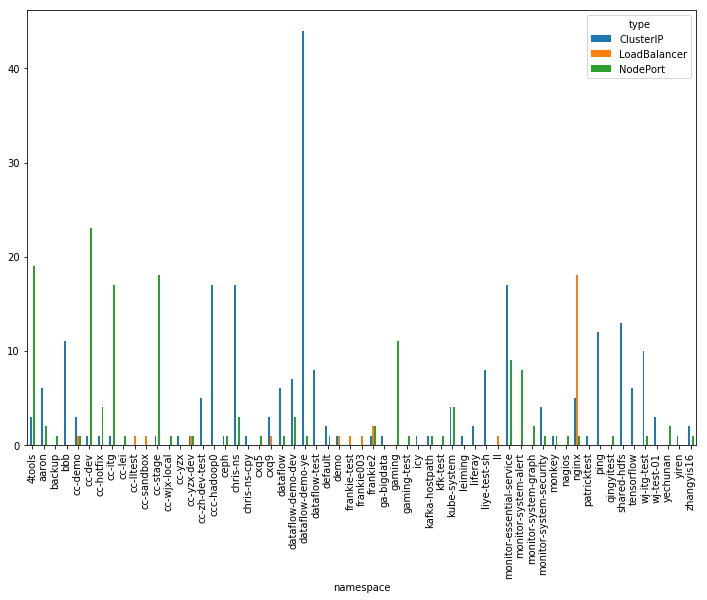

In [21]:
services.groupby(["namespace", "type"]).size().unstack().fillna(0).plot(kind="bar", figsize=(12,8))

## Deployment

### Create pod

In [22]:
from k8sclient.Components import PodBuilder
from k8sclient.keywords import (
    wait_for_pod_state,
    RUNNING,
    delete_pod,
    NOT_FOUND
)

In [ ]:
namespace = "monkey"
image = "127.0.0.1:30100/library/python-tools:v20170619"
args = "loggen.py"
name = "logstress"


def deploy():
    PodBuilder(
        name,
        namespace,
    ).add_container(
        name,
        image=image,
        args=args,
    ).deploy()
    wait_for_pod_state(namespace, name, 60, RUNNING)


def un_deploy():
    delete_pod(namespace, name)
    wait_for_pod_state(namespace, name, 60, NOT_FOUND)

### Use volumes

In [ ]:
from k8sclient.Components import (
    HostPathVolume, RBDVolume, CephFSVolume, EmptyDirVolume
)
volume_hostpath = HostPathVolume(
        "hostpath-1",
        "/apt/containers",
        "/data/docker/containers"
    )
volume_emptydir = EmptyDirVolume(
    "emptydir-1",
    "/data/something"
)

ceph_monitors = "10.19.137.144:6789,10.19.137.145:6789,10.19.137.146:6789"
ceph_pool = "monkey"
ceph_fstype = "xfs"
ceph_secret = "ceph-secret"
volume_rbd = RBDVolume(
        "rbd",
        "/apt/data",
        fs_type=ceph_fstype,
        image="default",
        pool=ceph_pool,
        monitors=ceph_monitors,
        secret_name=ceph_secret,
        sub_path="writetest",
        read_only=True
    )
volume_cephfs = CephFSVolume(
            "cephfs",
            "/tmp",
            monitors=ceph_monitors,
            secret_name=ceph_secret,
            fs_path="scrapy",
            sub_path="scrapy_name"
        )

def deploy():
    PodBuilder(
        name,
        namespace,
    ).add_container(
        name,
        image=image,
        args=args,
        volumes=[volume_hostpath, volume_rbd, volume_cephfs, volume_emptydir]
    ).deploy()

### Use service

In [ ]:
from k8sclient.Components import ServicePort, ServiceBuilder

udp_port = ServicePort("dataport", 8125, 8125, protocol="UDP")
http_port = ServicePort("httpport", 80, 80)
udp_service = ServiceBuilder("graphite", namespace).add_port(udp_port)
http_service = ServiceBuilder("graphite-ui", namespace, service_type="NodePort").add_port(http_port)

def deploy():
    PodBuilder(
        name,
        namespace,
    ).add_container(
        name=name,
        image=image,
        ports=[udp_port, http_port]
    ).attache_service(
        udp_service
    ).attach_service(
        http_service
    ).deploy()

### Env variables

In [ ]:
def deploy():
    PodBuilder(
        name,
        namespace,
    ).add_container(
        name,
        image=image,
        args=args,
        BATCH_SIZE=10000,
        BATCH_COUNT=1000
    ).deploy()

### Node select

In [ ]:
def deploy():
    PodBuilder(
        name,
        namespace,
    ).set_node(
        node
    ).add_container(
        name,
        image=image,
        args=args,
        BATCH_SIZE=10000,
        BATCH_COUNT=1000
    ).deploy()

### Replicaset example

In [26]:
from k8sclient.Components import ServicePort, ServiceBuilder, ReplicaSetBuilder
# from k8sclient.keywords import wait_for_pod_state, RUNNING

namespace = "k8sft"
name = "graphite"
image = "127.0.0.1:30100/yangtze/graphite-statsd"
# ports
udp_port = ServicePort("dataport", 8125, 8125, protocol="UDP")
http_port = ServicePort("httpport", 80, 80)
# service
udp_service = ServiceBuilder("graphite", namespace).add_port(udp_port)
http_service = ServiceBuilder("graphite-ui", namespace, service_type="NodePort").add_port(http_port)
# replica set
rs = ReplicaSetBuilder(
    name, namespace
).add_container(
    name=name + "-container",
    image=image,
    ports=[udp_port, http_port]
).attache_service(
    http_service
).attache_service(
    udp_service
).set_hostname(name)


def deploy():
    rs.deploy()
    udp_service.deploy()
    http_service.deploy()
    


def un_deploy():
    udp_service.un_deploy()
    http_service.un_deploy()
    rs.un_deploy()

un_deploy()

In [24]:
from k8sclient.dataframes import collect_namespaced_services
s, p, e = collect_namespaced_services("k8sft")
p

,name,node_port,port,protocol,service_id,target_port
0,dataport,None,8125,UDP,a4a5b305-8e19-11e7-93f9-1866da1a2629,8125
1,httpport,30804,80,TCP,a4a7832d-8e19-11e7-93f9-1866da1a2629,80


### switch cluster

In [14]:
from k8sclient.keywords import apply_resource_limit, list_namespaces
namespaces = list_namespaces()
specials = ['health-check', 'kube-system', "haproxy", "4tools"]
seondaries = ['ex-kafka', "jingwuyun", "jingwuyun-stable", "jingwuyun-test"]
for n in namespaces:
    if n in specials:
        print "%s is special, just ignore it." % n
        apply_resource_limit(n, min_cpu=None, min_memory=None)
        continue
    if n in seondaries:
        print "%s is secondary special, set lower min value" % n
        apply_resource_limit(n, min_cpu="200m", min_memory="256Mi", 
                             default_request_cpu="400m", default_request_memory="2G",
                            default_limit_cpu="2",
                            default_limit_memory="8G")
        continue
    apply_resource_limit(n, min_cpu="300m", min_memory="1G", 
                             default_request_cpu="400m", default_request_memory="2G",
                            default_limit_cpu="2",
                            default_limit_memory="8G")

4tools is special, just ignore it.
ex-kafka is secondary special, set lower min value
haproxy is special, just ignore it.
health-check is special, just ignore it.
jingwuyun is secondary special, set lower min value
jingwuyun-stable is secondary special, set lower min value
jingwuyun-test is secondary special, set lower min value
kube-system is special, just ignore it.


In [95]:
import numpy as np
with open('data/memory.failcnt') as f:
    memory_fails = f.read()
import re
p = re.compile(".*pod([-_a-z0-9]{36}).* (\d+)")
d = []
for i in p.findall(memory_fails):
    d.append((i[0].replace('_', '-'), int(i[1])))
failcnt = pd.DataFrame(d, columns=['id', 'memory.failcnt'])

pd.options.display.float_format = '{:,.1f}'.format
p1 = pd.merge(pods['pod'], failcnt, left_on="uid", right_on="id")
p2 = pd.merge(p1, pods['container'], left_on="uid", right_on="pod_id")
pp = p2[['namespace', 'pod', 'memory.failcnt', 'lmemory', 'ctime']]

duration = ((pp['ctime'] - pd.to_datetime(0, unit='s', utc=True)) / np.timedelta64(1, 's')).astype('int')
v = (pp['memory.failcnt'] * 60 / duration)
v.name = 'memory failcnt per minute'
pp = pd.concat([pp, v], axis=1)
pp[pp['memory failcnt per minute']>0.1]
ppp = pp.sort_values(by='memory failcnt per minute', ascending=False).set_index(['namespace', 'pod']).reset_index()
# ppp[ppp['memory.failcnt'] > 10000]
pppp = ppp[['namespace', 'pod', 'lmemory', 'memory failcnt per minute', 'memory.failcnt']]
#pppp[pppp['memory failcnt per minute'] > 10]
pppp[pppp.namespace == 'chenghao']

,namespace,pod,lmemory,memory failcnt per minute,memory.failcnt
116,chenghao,pre1-datanode-2525925841-63v41,24.0,0.9,21693669
119,chenghao,pre1-datanode-2525925841-whk3g,24.0,0.8,20352271
127,chenghao,pre1-datanode-2525925841-hj4sl,24.0,0.7,18853811
140,chenghao,pre1-datanode-2525925841-hllgq,24.0,0.6,16096688
145,chenghao,pre1-datanode-2525925841-dlfnw,24.0,0.5,11905506
159,chenghao,pre1-opentsdbcompact-1382063782-3fpq3,5.0,0.3,8342100
325,chenghao,pre1-datanode-2525925841-whk3g,24.0,0.0,114
328,chenghao,pre1-datanode-2525925841-hj4sl,24.0,0.0,87
331,chenghao,pre1-datanode-2525925841-hllgq,24.0,0.0,61
333,chenghao,pre1-datanode-2525925841-63v41,24.0,0.0,56


In [147]:
p = pods['pod']
p[p.pod_ip == "172.16.126.4"]

,annotations,cluster_name,ctime,dns_policy,host_ip,host_ipc,host_network,host_pid,namespace,node_name,phase,pod,pod_ip,qos_class,restart_policy,stime,uid
623,"io.enndata.dns/pod.enable=true,kubernetes.io/c...",None,2017-12-18 08:11:38+00:00,ClusterFirst,10.19.248.44,None,None,None,shared-hadoop,10.19.248.44,Running,pre1-datanode-1575399439-5khb3,172.16.126.4,Burstable,Always,2017-12-18 08:20:01+00:00,12abfa1a-e3cb-11e7-a4c2-2444279ffce5
